# Univariate/Simple Non-Linear Regression

In this notebook we will going to build a univariate non-linear regression model, specifically we will use polynomial features technique to map a single feature $x$ to target variable $y$.

## Outline

- [1 - Packages](#1)

- [2 - Dataset](#2)

- [3 - Univariate Non-Linear Regression Model Using Gradient Descent](#3)
    - [3.1 Custom Model GD](#3point1)
    - [3.2 Sklearn Model GD](#3point2)

- [4 - Univariate Non-Linear Regression Model Using Normal Equation](#4)
    - [4.1 Custom Model NE](#4point1)
    - [4.2 Sklearn Model NE](#4point2)

<a id="1"></a>
## 1 - Packages

Below are the packages/libraries that we are going to use in this notebook.

In [2]:
# Importing necessary packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gd_regression_model import GDRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

<a id="2"></a>
## 2 - Dataset

We will going to use synthethic dataset generated by ChatGPT.

The dataset has been downloaded and stored in `univariate_non_lr_dataset` folder. The folder contains a CSV file named **quadratic_dataset.csv**, we will train and test our model using the data in this file.

Let's first load the dataset into pandas dataframe and visualize it.

In [ ]:
# Loading the dataset into pandas dataframe
data = pd.read_csv("univariate_non_lr_dataset/quadratic_dataset.csv")
data

,x,y
0,-10.00000,102.483571
1,-9.97998,98.908679
2,-9.95996,102.439245
3,-9.93994,106.417555
4,-9.91992,97.234044
...,...,...
995,9.91992,96.999310
996,9.93994,107.790839
997,9.95996,102.405017
998,9.97998,96.744105


Text(0, 0.5, 'y')

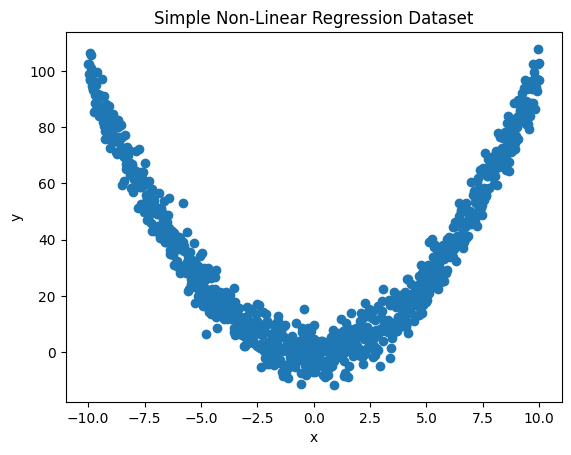

In [4]:
# Visualizing the dataset
plt.scatter(data["x"], data["y"])
plt.title("Simple Non-Linear Regression Dataset")
plt.xlabel("x")
plt.ylabel("y")

As we can see in the plot above that the feature $x$ has a non-linear relationship with target $y$, which makes it suitable for our goal of building a univariate non-linear regression model.

Let's first convert the dataset into numpy arrays and split it into training and testing sets.

In [5]:
# Converting pandas dataframe into numpy arrays
X = data["x"].to_numpy().reshape(-1, 1)
Y = data["y"].to_numpy().reshape(-1, 1)

print(f"Shape of X: {X.shape} & Shape of Y: {Y.shape}")

Shape of X: (1000, 1) & Shape of Y: (1000, 1)


In [6]:
# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape} & Shape of Y_train: {Y_train.shape}\n"
      f"Shape of X_test: {X_test.shape} & Shape of Y_test: {Y_test.shape}")

Shape of X_train: (700, 1) & Shape of Y_train: (700, 1)
Shape of X_test: (300, 1) & Shape of Y_test: (300, 1)


<a id="3"></a>
## 3 - Univariate Non-Linear Regression Model Using Gradient Descent

<a id="3point1"></a>
### 3.1 Custom Model GD

We will first build our own custom univariate non-linear regression model GD using NumPy, and then we will use Scikit-Learn library. And also we will use a vectorized approach for efficient implementation.

The univariate non-linear regression model can be represented as:

$$ \hat{Y} = f(X) = X \cdot W + B \tag{1} $$

where,
- $\hat{Y}$ is a prediction matrix.
- $X$ is a input feature matrix.
- $W$ is a weight matrix.
- $B$ is a bias matrix.

The cost function for our model will be Mean Squared Error (MSE):

$$ C = J(W, B) = \frac{\sum(\hat{Y} - Y)^2}{m} \tag{2} $$

where,
- $Y$ is a target variable matrix.
- $m$ is the number of training examples.

And we will train our model using gradient descent:

$$ W = W - \alpha * \frac{\partial J(W, B)}{\partial W} \tag{3} $$
$$ B = B - \alpha * \frac{\partial J(W, B)}{\partial B} \tag{4} $$

where,
$$ \frac{\partial J(W, B)}{\partial W}  = \frac{2}{m} * X^{T} \cdot (\hat{Y} - Y) \tag{5} $$
$$ \frac{\partial J(W, B)}{\partial B}  = \frac{2}{m} * \sum(\hat{Y} - Y) \tag{6} $$

_**NOTE:** All the code implementation of the above is in `gd_regression_model.py` file_.

Since the data follows a quadratic pattern, we will add $x^2$ as a feature before training. For this we will use **PolynomialFeatures** method from Scikit-Learn to transform $x$ into higher-degree polynomial terms, capturing the non-linearity.

As polynomial features vary in range, feature scaling is essential for faster convergence. We will also apply **StandardScaler** method from Scikit-Learn to standardize features, ensuring they have comparable ranges.

In [7]:
# Initializing and applying polynomial features of degree 2 (e.g. x^2) to training data
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Initializing and applying scaling method to training data
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

In [11]:
# Initializing and training our custom model gd for 1000 iterations
c_model = GDRegression(iterations=1000, alpha=0.1)
c_model.fit(X_train_poly_scaled, Y_train)

Iteration: 1/1000
Cost: 2001.4476015360021

Iteration: 2/1000
Cost: 1289.5269990151205

Iteration: 3/1000
Cost: 833.9019481018379

Iteration: 4/1000
Cost: 542.2973288016661

Iteration: 5/1000
Cost: 355.6628078455356

Iteration: 6/1000
Cost: 236.2089102708549

Iteration: 7/1000
Cost: 159.7515247297036

Iteration: 8/1000
Cost: 110.81317375573238

Iteration: 9/1000
Cost: 79.48825253285932

Iteration: 10/1000
Cost: 59.437004443385376

Iteration: 11/1000
Cost: 46.60177612312872

Iteration: 12/1000
Cost: 38.38547117008438

Iteration: 13/1000
Cost: 33.12577978156234

Iteration: 14/1000
Cost: 29.75868970639001

Iteration: 15/1000
Cost: 27.603130464321097

Iteration: 16/1000
Cost: 26.22314044322812

Iteration: 17/1000
Cost: 25.339648323830833

Iteration: 18/1000
Cost: 24.774008260238936

Iteration: 19/1000
Cost: 24.411858343262402

Iteration: 20/1000
Cost: 24.17998684979099

Iteration: 21/1000
Cost: 24.031524248152085

Iteration: 22/1000
Cost: 23.936464314087093

Iteration: 23/1000
Cost: 23.875

Text(0, 0.5, 'Cost')

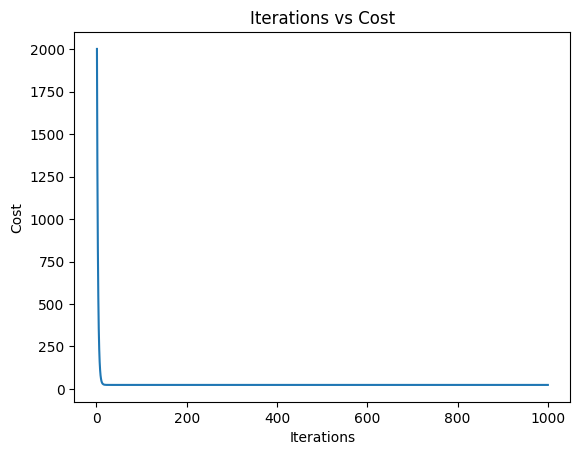

In [12]:
# Plotting the training history of the model
history = np.array(c_model.history)

plt.plot(history[:, 0], history[:, 1])
plt.title("Iterations vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

As we can see in the above plot that cost has been minimized, thus resulting in optimal parameters for the model. Now we are ready to make prediction, remembering that we have to follow the same procedure the we have followed for training data before training.

In [13]:
# Applying the polynomial transformation to test data
X_test_poly = poly.transform(X_test)

# Scaling the test data with same mean and std of training data
X_test_poly_scaled = scaler.transform(X_test_poly)

In [14]:
# Making predication and computing the cost
Y_hat_test = c_model.make_prediction(X_test_poly_scaled)

cost = c_model.compute_cost(Y_hat_test, Y_test)
print(f"Cost: {cost}")

Cost: 24.39930853355863


The test cost is near to training cost. Now let's visualize our fitted model on both training and testing datasets.

In [15]:
# Getting the sorted indices of training and testing data for correct ploting
train_sort = np.argsort(X_train, axis=0).flatten()
test_sort = np.argsort(X_test, axis=0).flatten()

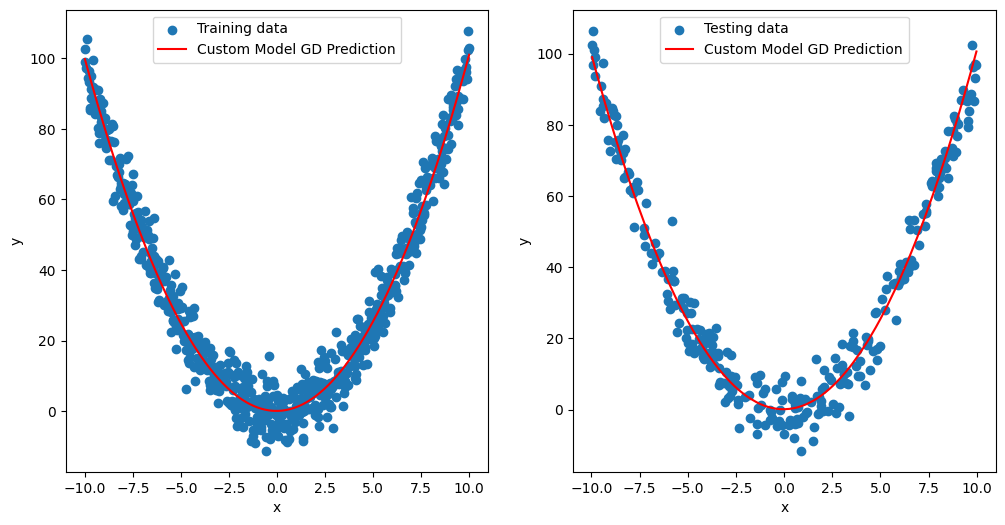

In [18]:
# Visualizing the datasets with custom model gd predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([(X_train, Y_train), (X_test, Y_test)]):
    axes[i].scatter(data[0], data[1], label="Training data" if i == 0 else "Testing data")
    axes[i].plot(
        (data[0][train_sort]) if i == 0 else (data[0][test_sort]), 
        (c_model.make_prediction(X_train_poly_scaled)[train_sort]) if i == 0 else \
        (c_model.make_prediction(X_test_poly_scaled)[test_sort]),
        label="Custom Model GD Prediction",
        c="r"
    )
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

By looking at the above plots we can now mark our goal of building a **custom univariate non-linear regression model using gradient descent** as completed.

<a id="3point2"></a>
### 3.2 Sklearn Model GD

Now we are going to use Scikit-Learn library to build **univariate non-linear regression model using gradient descent**.

In [19]:
# Initializing and training SGDRegressor model from Scikit-Learn
sgd_reg_model = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)
sgd_reg_model.fit(X_train_poly_scaled, Y_train.ravel())

SGDRegressor(eta0=0.1, random_state=42)

In [20]:
# Making predication and computing the cost
Y_hat_test_ = sgd_reg_model.predict(X_test_poly_scaled).reshape(-1, 1)

cost_ = c_model.compute_cost(Y_hat_test_, Y_test)
print(f"Cost: {cost_}")

Cost: 24.49164885511243


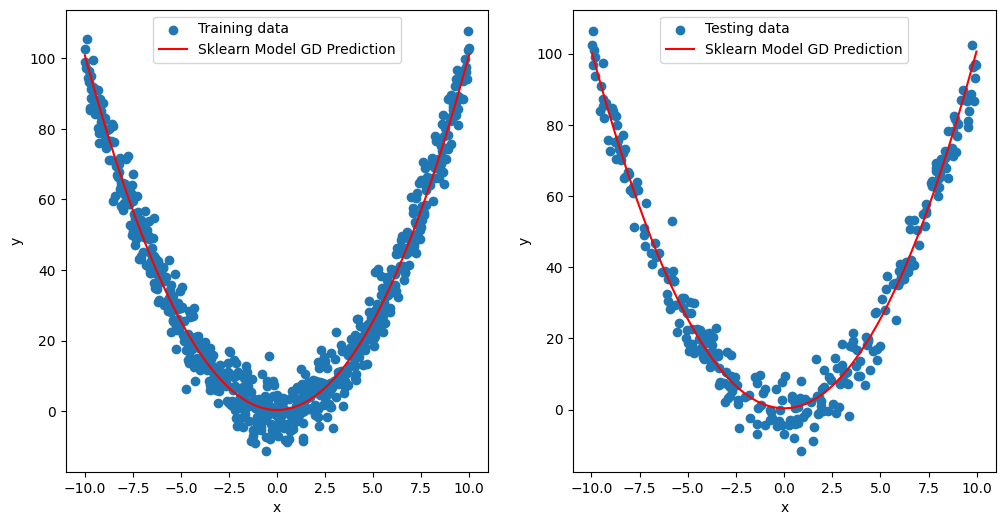

In [21]:
# Visualizing the datasets with sklearn model gd predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([(X_train, Y_train), (X_test, Y_test)]):
    axes[i].scatter(data[0], data[1], label="Training data" if i == 0 else "Testing data")
    axes[i].plot(
        (data[0][train_sort]) if i == 0 else (data[0][test_sort]), 
        (sgd_reg_model.predict(X_train_poly_scaled)[train_sort]) if i == 0 else \
        (sgd_reg_model.predict(X_test_poly_scaled)[test_sort]),
        label="Sklearn Model GD Prediction",
        c="r"
    )
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

Both the Custom model and Scikit-Learn model has achieved identical results on both datasets, marking the completion of **Univariate Non-Linear Regression Model Using Gradient Descent**.

<a id="4"></a>
## 4 - Univariate Non-Linear Regression Model Using Normal Equation

<a id="4point1"></a>
### 4.1 Custom Model NE

Just like previous one we will first build our own custom univariate non-linear regression model NE using Numpy, and then we will make use of Scikit-Learn library.

We only have to implement the below equation in code to find the optimal parameters for our model:

$$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot Y \tag{1} $$

where,
- $W$ is a model parameters matrix.
- $X$ is a input feature matrix.
- $Y$ is a target variable matrix.

_**NOTE:** Solving regression problem using normal equation requires the bias term to be included in weight matrix. Therefore we also have to add 1's column vector to our original feature datasets, so the dimensions should be matched during matrix multiplication. And also feature scaling is not required because it does not use gradient descent to find the optimal parameters for the model._

In [22]:
# Adding 1's column vector to polynomial feature datasets
X_train_poly_ = np.hstack((X_train_poly, np.ones_like(X_train)))
X_test_poly_ = np.hstack((X_test_poly, np.ones_like(X_test)))

print(f"Shape of X_train_poly_: {X_train_poly_.shape} & Shape of X_test_poly_: {X_test_poly_.shape}")

Shape of X_train_poly_: (700, 3) & Shape of X_test_poly_: (300, 3)


In [23]:
# Finding the optimal parameters using normal equation method
W = np.linalg.inv(X_train_poly_.T @ X_train_poly_) @ (X_train_poly_.T @ Y_train)
print(f"Optimal parameters:\n {W}")

Optimal parameters:
 [[0.06095383]
 [1.00286885]
 [0.09512411]]


In [24]:
# Making predication and computing the cost
print(f"Cost: {c_model.compute_cost((X_test_poly_ @ W), Y_test)}")

Cost: 24.39930853355863


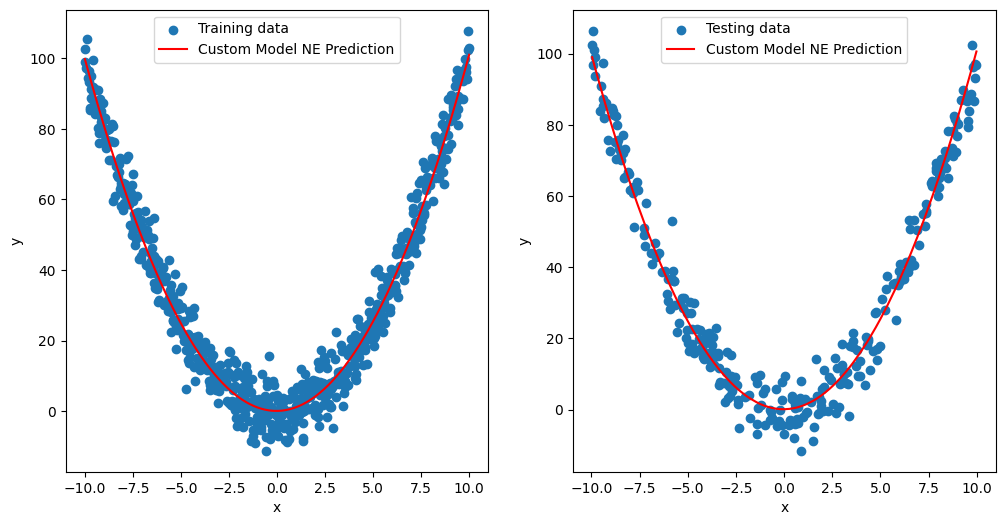

In [25]:
# Visualizing the datasets with custom model ne predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([(X_train, Y_train), (X_test, Y_test)]):
    axes[i].scatter(data[0], data[1], label="Training data" if i == 0 else "Testing data")
    axes[i].plot(
        (data[0][train_sort]) if i == 0 else (data[0][test_sort]), 
        ((X_train_poly_ @ W)[train_sort]) if i == 0 else ((X_test_poly_ @ W)[test_sort]),
        label="Custom Model NE Prediction",
        c="r"
    )
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

The results match with the gradient descent trained model, but with much less implementation.

<a id="4point2"></a>
### 4.2 Sklearn Model NE

Now we are going to use Scikit-Learn library to build **univariate non-linear regression model using normal equation**.

In [26]:
# Initializing and training LinearRegression model from Scikit-Learn
linear_reg_model = LinearRegression(fit_intercept=False)
linear_reg_model.fit(X_train_poly_, Y_train)

LinearRegression(fit_intercept=False)

In [27]:
# Making predication and computing the cost
print(f"Cost: {c_model.compute_cost(linear_reg_model.predict(X_test_poly_), Y_test)}")

Cost: 24.399308533558653


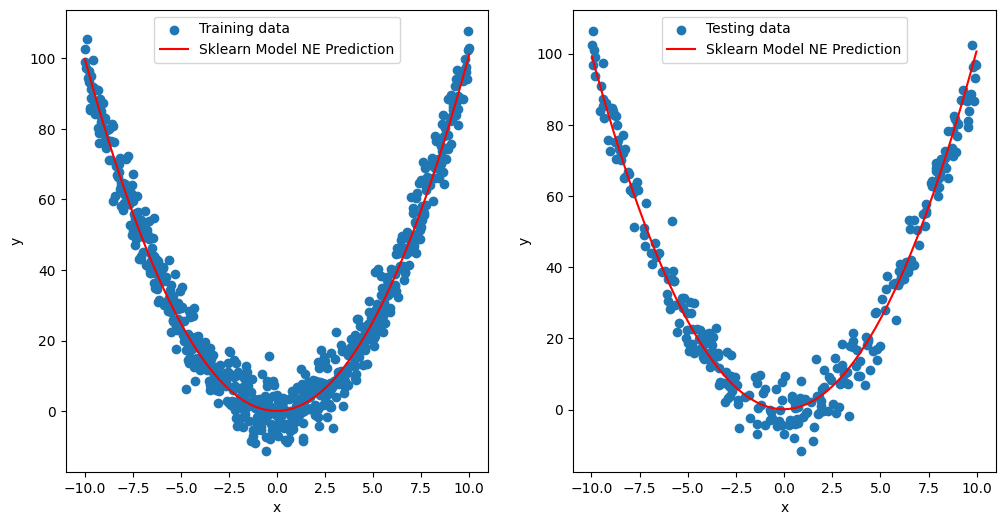

In [28]:
# Visualizing the datasets with sklearn model ne predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([(X_train, Y_train), (X_test, Y_test)]):
    axes[i].scatter(data[0], data[1], label="Training data" if i == 0 else "Testing data")
    axes[i].plot(
        (data[0][train_sort]) if i == 0 else (data[0][test_sort]), 
        (linear_reg_model.predict(X_train_poly_)[train_sort]) if i == 0 else \
        (linear_reg_model.predict(X_test_poly_)[test_sort]),
        label="Sklearn Model NE Prediction",
        c="r"
    )
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

Same as gradient descent based case, both the Custom model and Scikit-Learn model has achieved identical results on both datasets, marking the completion of **Univariate Non-Linear Regression Model Using Normal Equation**.